# Experiment 2

## Problem Statement:
To build an ANN Model to convert temperature in degree Celsius to Fahrenheit.

**Problem Description:**


## Code

In [10]:
# importing required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# loading the dataset
dataset = pd.read_csv('celcius_to_fahrenheit_dataset.csv')

# printing the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(dataset.head())

# printing the last 5 rows of the dataset
print("\nLast 5 rows of the dataset:")
print(dataset.tail())


First 5 rows of the dataset:
   Celsius  Fahrenheit
0      -67       -88.6
1       40       104.0
2      -97      -142.6
3       57       134.6
4      -50       -58.0

Last 5 rows of the dataset:
     Celsius  Fahrenheit
995      -80      -112.0
996       50       122.0
997       18        64.4
998       47       116.6
999      -67       -88.6


In [12]:
# describing the dataset
print("\nDescription of the dataset:")
print(dataset.describe())

# checking information about the dataset
print("\nInformation about the dataset:")
print(dataset.info())


Description of the dataset:
           Celsius   Fahrenheit
count  1000.000000  1000.000000
mean     -0.029000    31.947800
std      57.334173   103.201511
min    -100.000000  -148.000000
25%     -50.000000   -58.000000
50%      -2.000000    28.400000
75%      50.000000   122.000000
max     100.000000   212.000000

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     1000 non-null   int64  
 1   Fahrenheit  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB
None


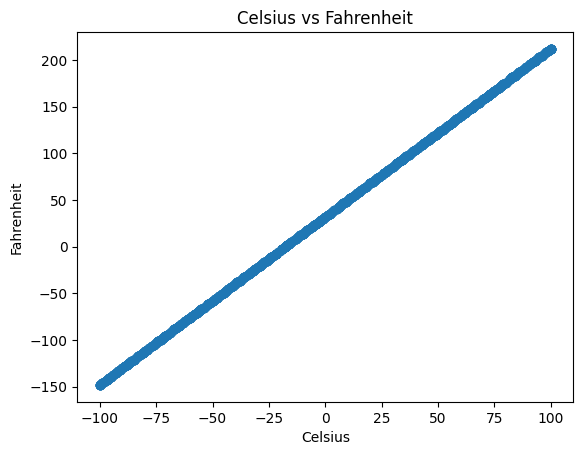

In [14]:
# plotting scatter plot between Celsius and Fahrenheit
plt.scatter(dataset['Celsius'], dataset['Fahrenheit'])
plt.title('Celsius vs Fahrenheit')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

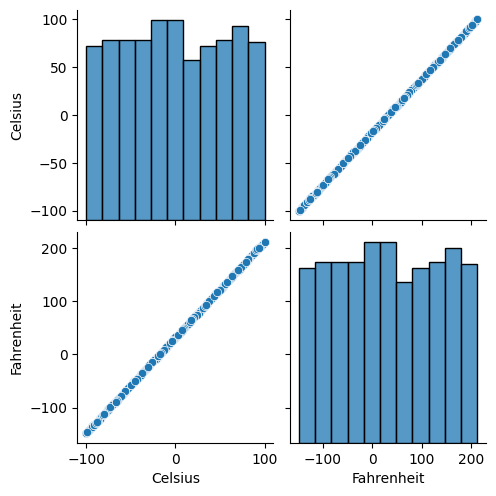

In [15]:
# plotting the pair plot of the dataset
sns.pairplot(dataset)
plt.show()
    

In [16]:
# creating training and testing dataset
X_train = dataset['Celsius']
y_train = dataset['Fahrenheit']

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (1000,)
Shape of y_train: (1000,)


In [17]:
# training the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units= 32 , input_shape = (1,)))
#Dense when we have fully connected atificial neural network
# now we are adding one more layer to the network
model.add(tf.keras.layers.Dense(units = 32))
# now adding the output layer
model.add(tf.keras.layers.Dense(units = 1))

In [18]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# compiling the model
model.compile(optimizer= tf.keras.optimizers.Adam(1), loss = 'mean_squared_error')

# training the model
epochs_hist = model.fit(X_train, y_train, epochs = 30, validation_split= 0.2)

Epoch 1/30
25/25 [==============================] - 1s 13ms/step - loss: 154748688.0000 - val_loss: 10885253.0000
Epoch 2/30
25/25 [==============================] - 0s 4ms/step - loss: 8131147.0000 - val_loss: 1029243.4375
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 227999.5781 - val_loss: 48657.9453
Epoch 4/30
25/25 [==============================] - 0s 4ms/step - loss: 20210.2188 - val_loss: 8633.5439
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 1845.0969 - val_loss: 53.5072
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 101.2542 - val_loss: 44.9208
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 8.7093 - val_loss: 1.1834
Epoch 8/30
25/25 [==============================] - 0s 4ms/step - loss: 0.5557 - val_loss: 0.0288
Epoch 9/30
25/25 [==============================] - 0s 4ms/step - loss: 0.0421 - val_loss: 0.0039
Epoch 10/30
25/25 [==============================] - 0s 4ms/step - 

Loss of the model: 4.648282203589815e-09
Validation Loss of the model: 4.594048252926086e-09


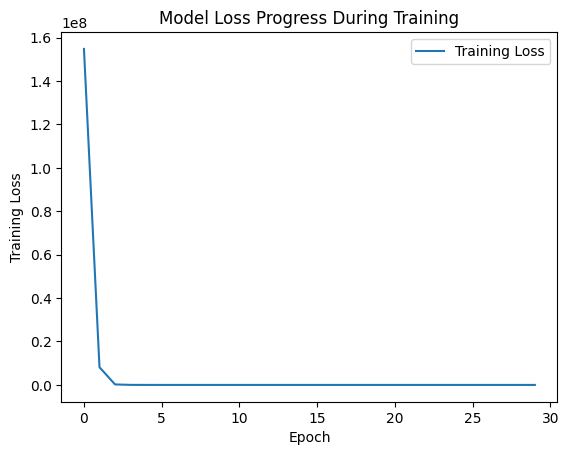

In [28]:
# evaluating the model
print("Loss of the model:", epochs_hist.history['loss'][-1])
print("Validation Loss of the model:", epochs_hist.history['val_loss'][-1])

# plotting the loss
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

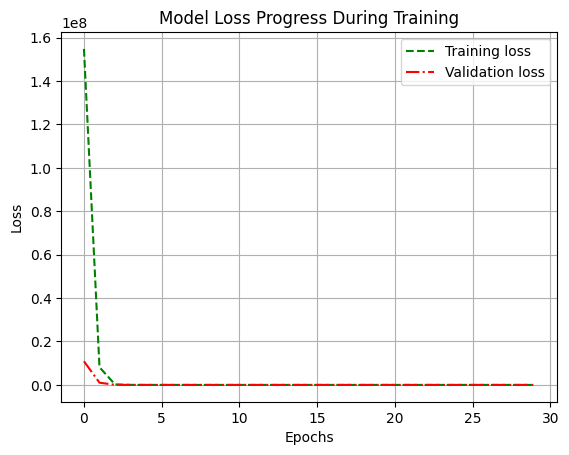

In [29]:
# plotting the loss and validation loss together
plt.plot(epochs_hist.history['loss'], color='green', label='Training loss', linestyle='--')
plt.plot(epochs_hist.history['val_loss'], color='red', label='Validation loss', linestyle='-.')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# model weights
print("Model Weights:", model.get_weights())


Model Weights: [array([[ 0.15610094, -0.29759288, -0.6900348 , -0.57925093,  0.6612573 ,
        -0.7082322 , -0.2970955 , -0.30609286, -0.11099577, -0.995773  ,
        -0.30973834,  0.72858536,  0.5891349 ,  0.20666592,  1.5602446 ,
        -0.12427184, -0.01973047, -0.5940874 , -0.11238211,  0.8609634 ,
        -0.15840285, -0.57451785,  0.68685067, -0.30075026, -0.04799562,
         0.251462  , -0.39821926, -0.7772923 , -0.12985253, -1.0930278 ,
         0.70404226,  0.58211213]], dtype=float32), array([-4.0618667e-01,  9.1498165e+00, -5.6935768e+00, -1.0077577e+01,
        4.9993496e+00, -3.9527121e+00, -1.0545947e+01,  9.9088612e+00,
        2.3929290e-02, -1.0690626e+01,  9.6639881e+00,  5.2819219e+00,
       -9.8683920e+00,  9.7408900e-03,  8.4272891e-01,  7.1452469e-01,
        1.5579948e+00, -1.1638421e+01,  4.4132638e-01, -1.0058521e+01,
        9.5795612e+00,  9.2182007e+00,  3.7714274e+00,  2.9749210e+00,
        1.2877667e+00, -9.6540337e+00,  9.8565016e+00,  9.9187307e+0

In [31]:
# making predictions
Celsius_value = 100
Fahrenheit_value = model.predict([Celsius_value])
print("Fahrenheit value for Celsius value 100:", Fahrenheit_value)

# calculating with formula
Fahrenheit_value = 9/5 * Celsius_value + 32
print("Fahrenheit value for Celsius value 100:", Fahrenheit_value)


1/1 [==============================] - 0s 205ms/step
Fahrenheit value for Celsius value 100: [[212.0001]]
Fahrenheit value for Celsius value 100: 212.0


In [ ]:
# saving the model
model.save('celcius_to_fahrenheit_model.h5')